# Prototype for Subimage Cropping for Checklist1

## How to figure out the location of a box

1. Open the blank reference form in an image editing program. 
2. Use the rectange select tool to select the largest possible area corresponding to the variable you are trying to bound. 
3. Record the position and size in pixels 

![finding box locations](images/references/find_boxes.gif)


In [30]:
#import image class from Pillow
from PIL import Image
import cv2
import imbo

In [75]:
#create list of sub images with origin locations and size on prototype form
sub_images = {
                "Name": 
                    {"x": 452, "y": 268,"width": 900, "height": 204},
                 "DOB":
                    {"x": 1468, "y": 264,"width": 304, "height": 220},
                 "Unique_id":
                    {"x": 1970, "y": 17,"width": 610, "height": 368},
                 "Date":
                    {"x": 1348, "y": 2288,"width": 308, "height": 152},
                 "Staff":
                    {"x": 1860, "y": 2280,"width": 68, "height": 164},
                 "UnitsShown":
                    {"x": 2212, "y": 2452,"width": 244, "height": 132},
                 "LotNum":
                    {"x": 2052, "y": 2564, "width": 400, "height": 112},
                 "ExpDate":
                    {"x": 2132, "y": 2656, "width": 316, "height": 120}
             }

In [76]:
blank_form = cv2.imread("images/Checklist1.jpg")
#create blank form with bounding boxes
for sub_image in sub_images.keys():
    #create bounding box
    y_0 = sub_images[sub_image]["y"]
    y_1 = sub_images[sub_image]["y"] + sub_images[sub_image]["height"]
    x_0 = sub_images[sub_image]["x"]
    x_1 = sub_images[sub_image]["x"] + sub_images[sub_image]["width"]
    #draw the bounding box
    box_blank = imbo.draw(blank_form, x_0, y_0, x_1,y_1, sub_image)

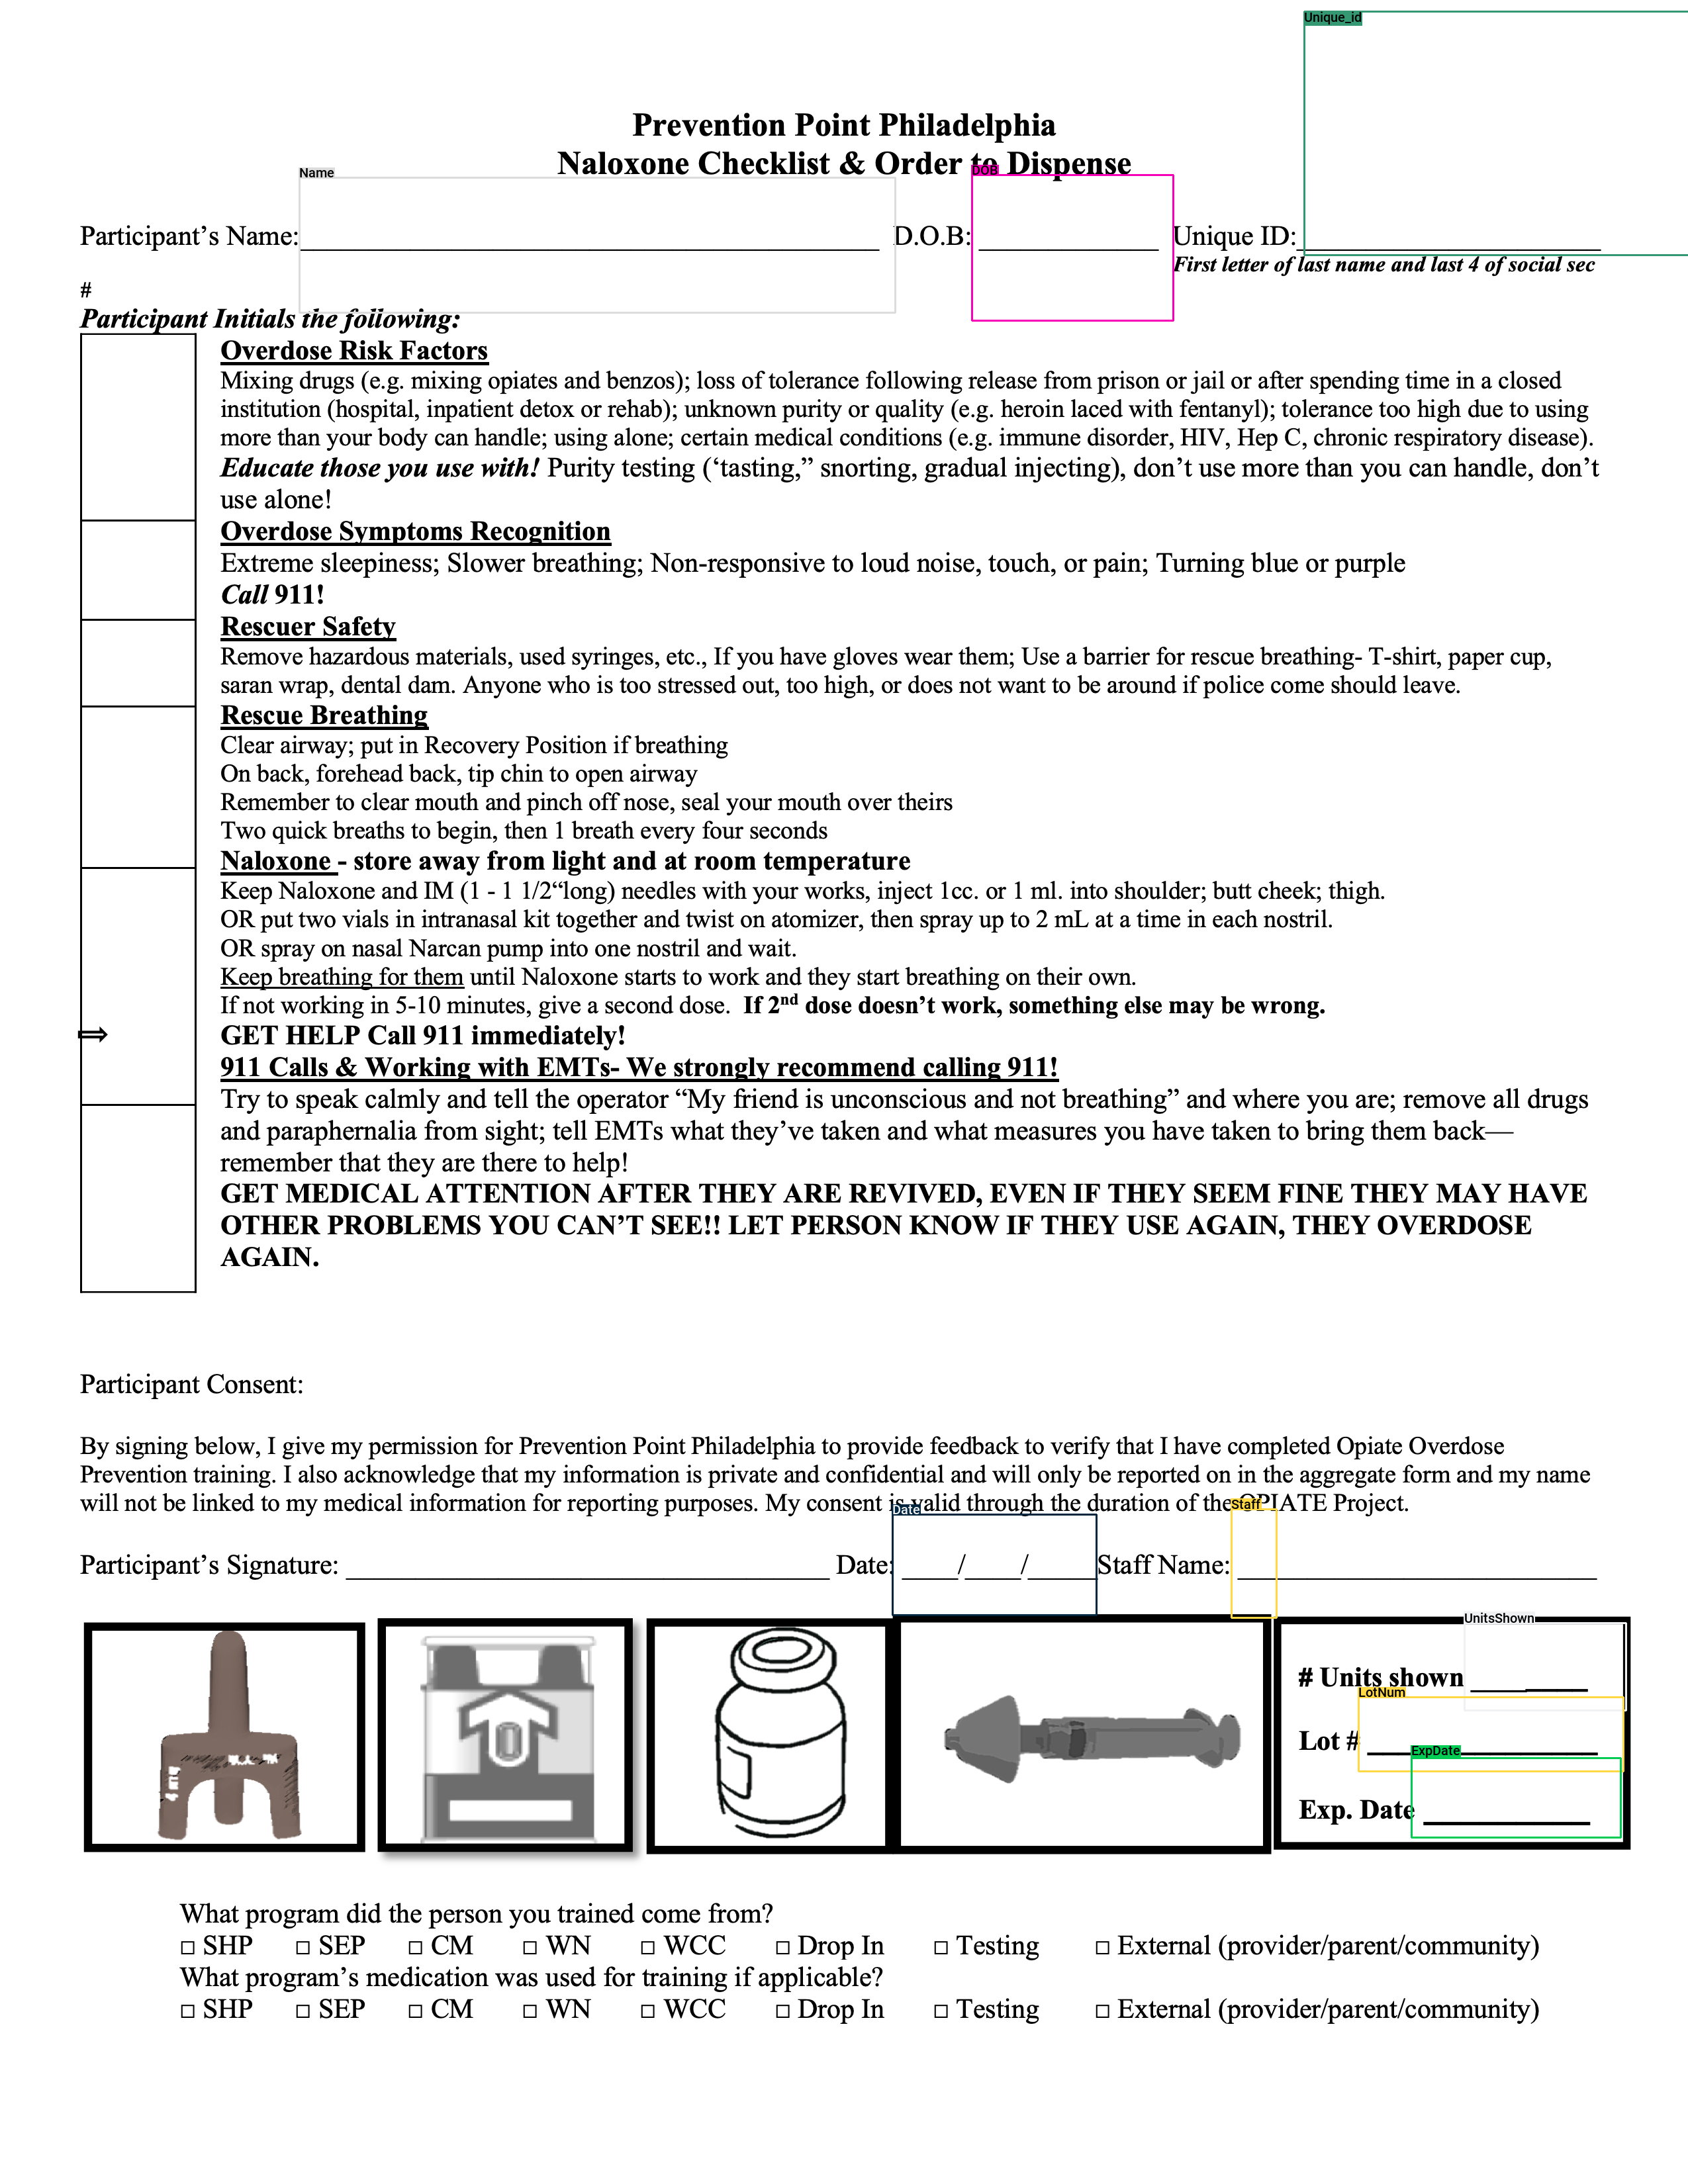

In [77]:
Image.fromarray(box_blank)

In [73]:
#path where the aligned images are stored
images_path = "images/aligned"
#path to folder to store subimages 
sub_image_path = "images/sub_images/"
#path to individual image
this_image_path = "/Checklist1 9.jpg"

#current form to scan
img = cv2.imread(images_path + this_image_path, cv2.IMREAD_GRAYSCALE)
bgr_img = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR) 

#crop all sub images
for sub_image in sub_images.keys():
    #create name to save sub image under
    sub_image_name = str(sub_image) + ".jpeg"
    #create bounding box
    y_0 = sub_images[sub_image]["y"]
    y_1 = sub_images[sub_image]["y"] + sub_images[sub_image]["height"]
    x_0 = sub_images[sub_image]["x"]
    x_1 = sub_images[sub_image]["x"] + sub_images[sub_image]["width"]
    #crop the image
    cropped_img = img[y_0:y_1,x_0:x_1]
    #draw the bounding box
    box_image = imbo.draw(bgr_img, x_0, y_0, x_1,y_1, sub_image)
    outFilename = sub_image_path + sub_image + ".jpeg"
    #save the image
    cv2.imwrite(outFilename, cropped_img)

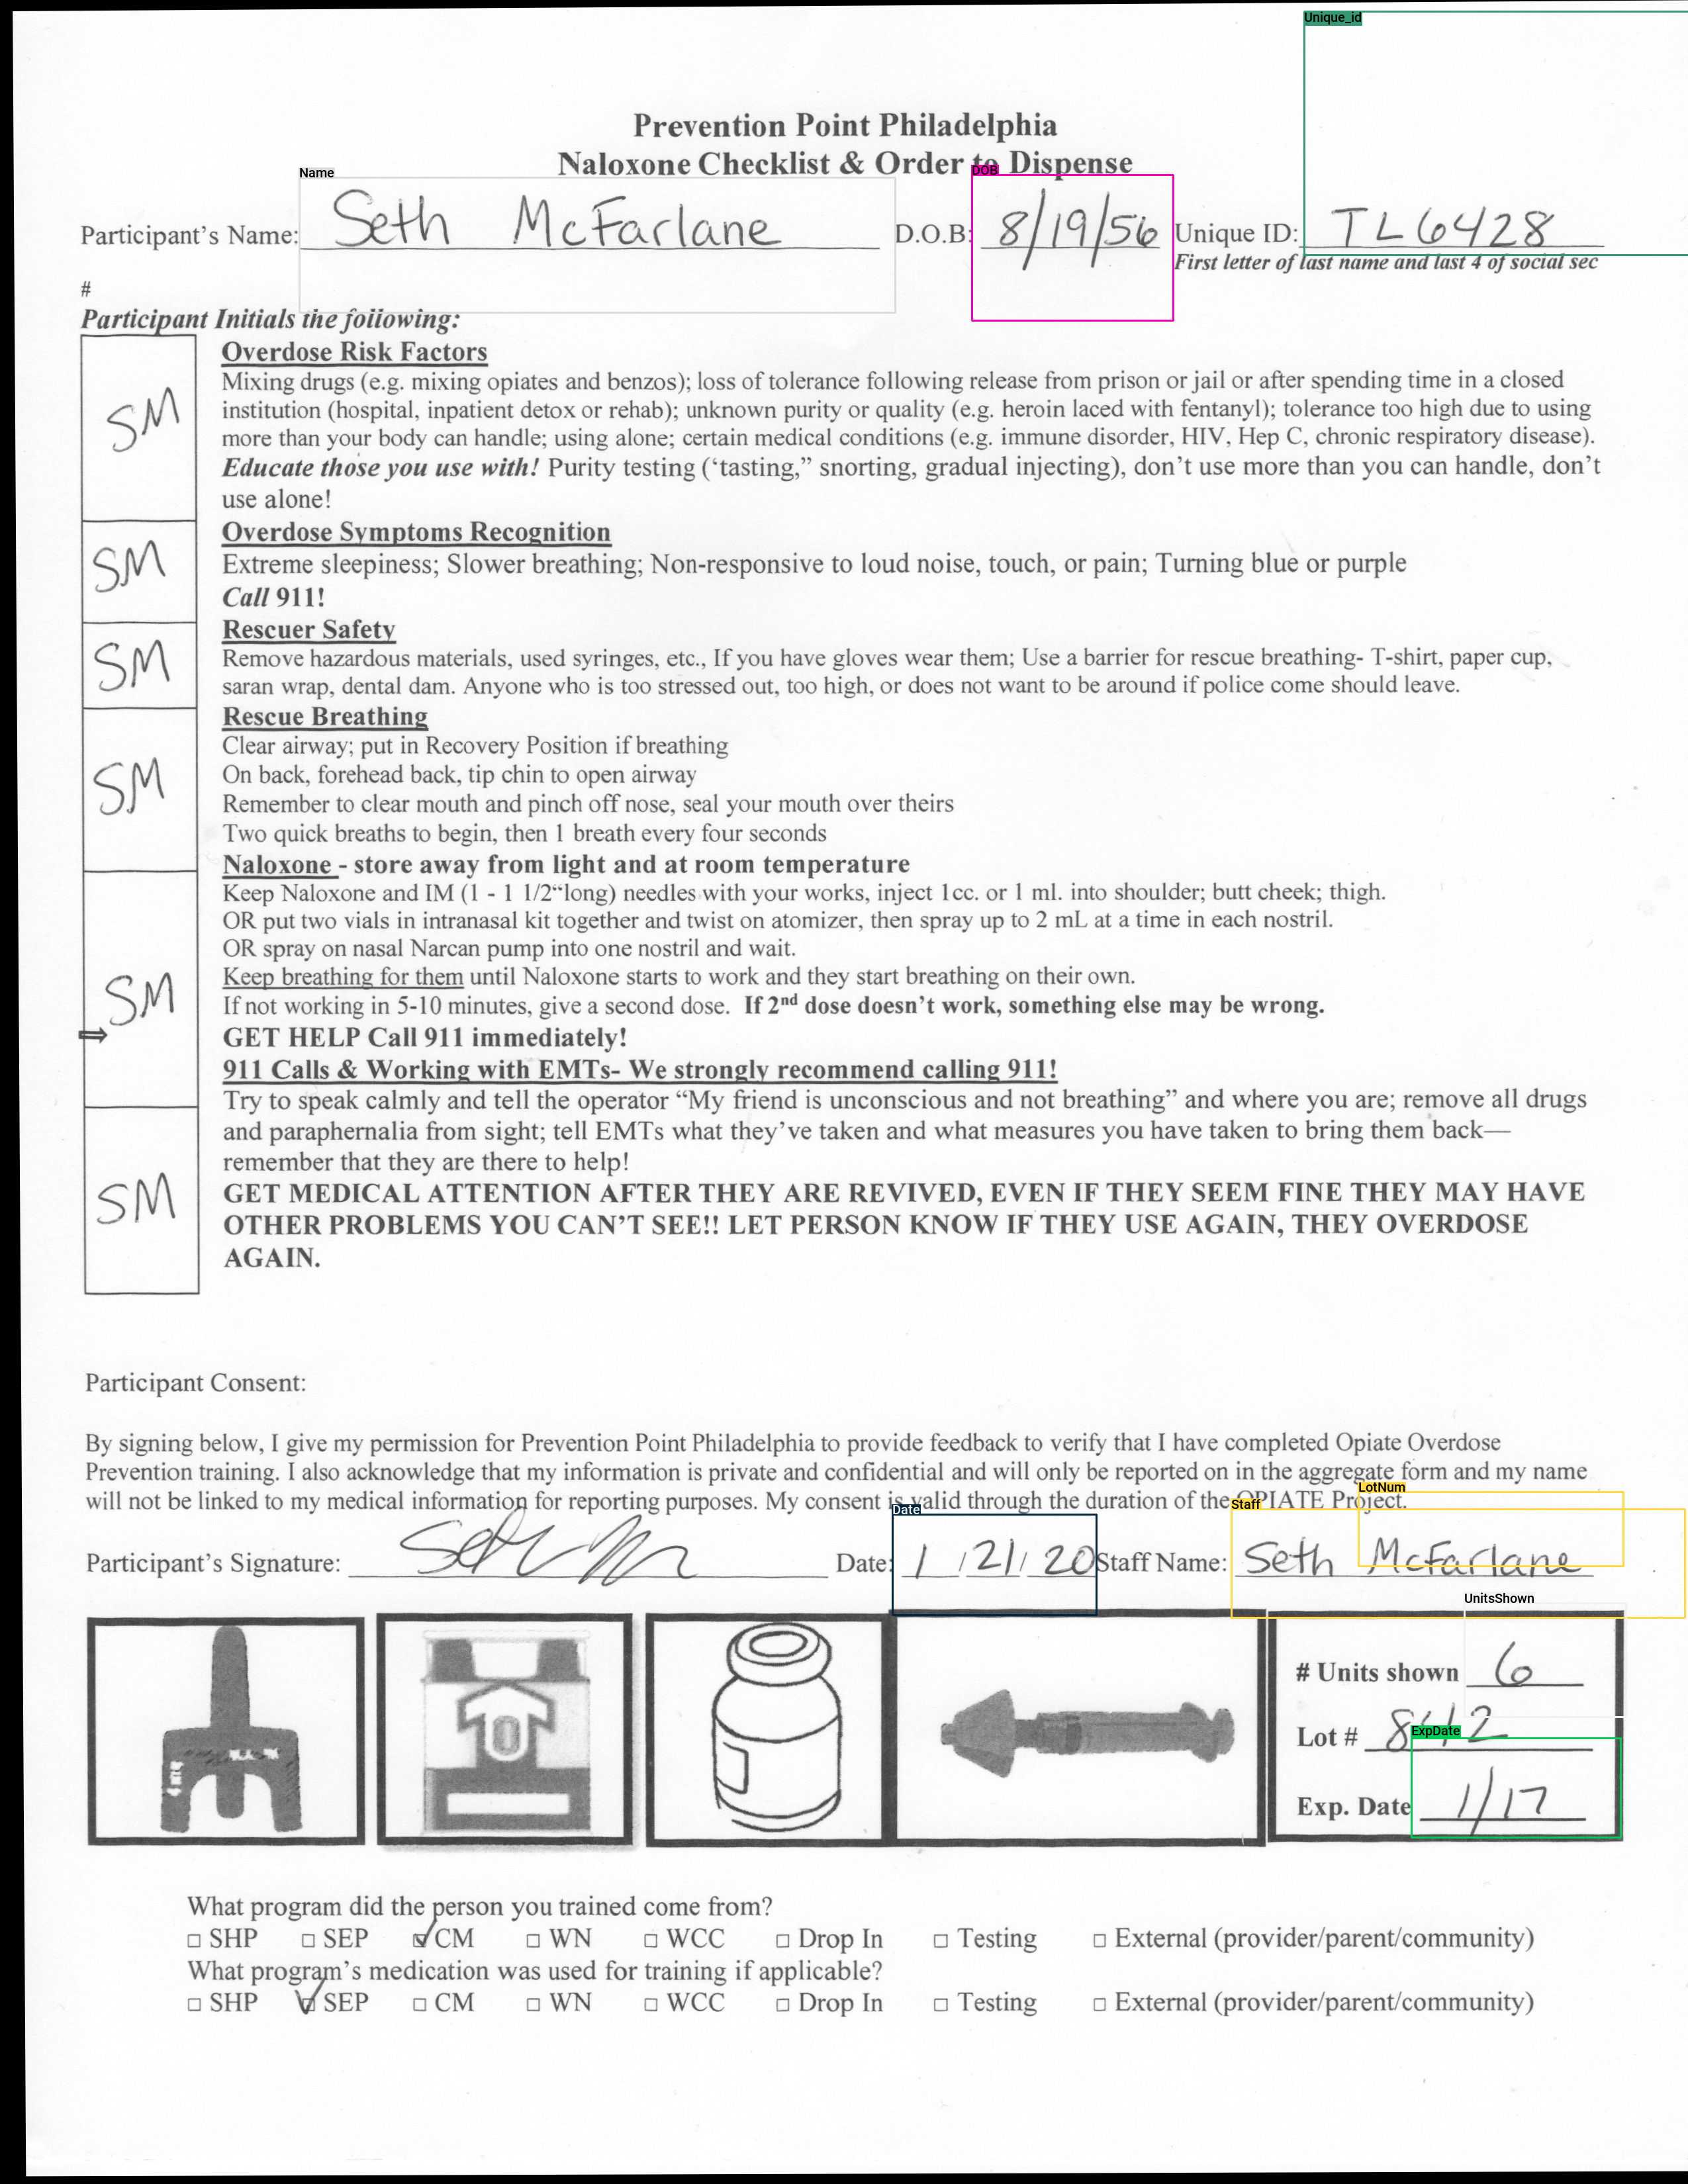

In [67]:
Image.fromarray(box_image)